# Dataset:

Vehicle Collision Dataset
- Description: The vehicle collision dataset contains records of car accidents with various details about each incident.
- Columns: Includes identifiers, dates, times, person types, injury severities, ages, positions, safety equipment, and contributing factors.
- Purpose: To predict the severity of car accidents using machine learning.
- Applications: Helps emergency responders, informs safety initiatives, and enhances road safety.
- Analysis Tasks: Data preprocessing, feature selection, model training, evaluation, and extracting insights.
- Relevance: Crucial for improving emergency response times and implementing proactive safety measures to reduce accident impacts.mpacts.


## Step 1: Import Libraries

In [55]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Step 2: Loading the Dataset

In [56]:
data=pd.read_csv(r"C:\Users\pvaib\Vehicle Collision.csv")

## Step 3: Data Preprocessing and EDA

In [57]:
data.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10253606,4230743.0,10/24/2019,19:15,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M
1,10248708,4229547.0,10/26/2019,1:15,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,...,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F
2,10254556,4230715.0,10/26/2019,8:50,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Knee-Lower Leg Foot,Driver,Unknown,NaN,NaN,None Visible,Driver,NaN,NaN,M
3,10250834,4230376.0,10/26/2019,19:40,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Back,Driver,NaN,NaN,NaN,Internal,Driver,NaN,NaN,M
4,10252474,4229773.0,10/26/2019,16:50,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,50.0,Not Ejected,...,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230660 entries, 0 to 230659
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   UNIQUE_ID              230660 non-null  object 
 1   COLLISION_ID           230656 non-null  float64
 2   CRASH_DATE             230656 non-null  object 
 3   CRASH_TIME             230656 non-null  object 
 4   PERSON_ID              230653 non-null  object 
 5   PERSON_TYPE            230656 non-null  object 
 6   PERSON_INJURY          230656 non-null  object 
 7   VEHICLE_ID             181937 non-null  float64
 8   PERSON_AGE             229663 non-null  float64
 9   EJECTION               102787 non-null  object 
 10  EMOTIONAL_STATUS       126918 non-null  object 
 11  BODILY_INJURY          126959 non-null  object 
 12  POSITION_IN_VEHICLE    102906 non-null  object 
 13  SAFETY_EQUIPMENT       90120 non-null   object 
 14  PED_LOCATION           26292 non-nul

In [59]:
data.describe()

,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,2.306560e+05,1.819370e+05,229663.000000
mean,2.824113e+06,1.567930e+07,36.474029
std,1.497211e+06,3.051295e+06,84.924692
min,3.900000e+01,6.029470e+05,-997.000000
25%,2.812695e+06,1.353522e+07,23.000000
50%,3.474966e+06,1.714574e+07,33.000000
75%,3.873819e+06,1.795996e+07,49.000000
max,4.695378e+06,2.058575e+07,9999.000000


In [60]:
data.columns.values

array(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME',
       'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID',
       'PERSON_AGE', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY',
       'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_LOCATION',
       'PED_ACTION', 'COMPLAINT', 'PED_ROLE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2', 'PERSON_SEX'], dtype=object)

In [61]:
# Checking for null values
data.isnull().sum()

UNIQUE_ID                     0
COLLISION_ID                  4
CRASH_DATE                    4
CRASH_TIME                    4
PERSON_ID                     7
PERSON_TYPE                   4
PERSON_INJURY                 4
VEHICLE_ID                48723
PERSON_AGE                  997
EJECTION                 127873
EMOTIONAL_STATUS         103742
BODILY_INJURY            103701
POSITION_IN_VEHICLE      127754
SAFETY_EQUIPMENT         140540
PED_LOCATION             204368
PED_ACTION               204430
COMPLAINT                103687
PED_ROLE                 103687
CONTRIBUTING_FACTOR_1    205452
CONTRIBUTING_FACTOR_2    205477
PERSON_SEX               103768
dtype: int64

In [62]:
# Drop irrelevant columns
columns_to_drop = ['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'VEHICLE_ID']
data = data.drop(columns=columns_to_drop)

In [63]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [64]:
# Checking for null values
data.isnull().sum()

PERSON_TYPE              0
PERSON_INJURY            0
PERSON_AGE               0
EJECTION                 0
EMOTIONAL_STATUS         0
BODILY_INJURY            0
POSITION_IN_VEHICLE      0
SAFETY_EQUIPMENT         0
PED_LOCATION             0
PED_ACTION               0
COMPLAINT                0
PED_ROLE                 0
CONTRIBUTING_FACTOR_1    0
CONTRIBUTING_FACTOR_2    0
PERSON_SEX               0
dtype: int64

In [65]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230660 entries, 0 to 230659
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   PERSON_TYPE            230660 non-null  int32
 1   PERSON_INJURY          230660 non-null  int32
 2   PERSON_AGE             230660 non-null  int32
 3   EJECTION               230660 non-null  int32
 4   EMOTIONAL_STATUS       230660 non-null  int32
 5   BODILY_INJURY          230660 non-null  int32
 6   POSITION_IN_VEHICLE    230660 non-null  int32
 7   SAFETY_EQUIPMENT       230660 non-null  int32
 8   PED_LOCATION           230660 non-null  int32
 9   PED_ACTION             230660 non-null  int32
 10  COMPLAINT              230660 non-null  int32
 11  PED_ROLE               230660 non-null  int32
 12  CONTRIBUTING_FACTOR_1  230660 non-null  int32
 13  CONTRIBUTING_FACTOR_2  230660 non-null  int32
 14  PERSON_SEX             230660 non-null  int32
dtypes: int32(15)
memo

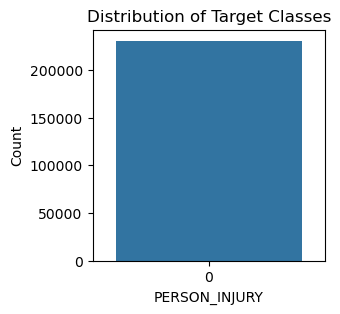

In [67]:
# Visualize the distribution of target classes:
plt.figure(figsize=(3, 3))
sns.countplot(data['PERSON_INJURY'])
plt.xlabel('PERSON_INJURY')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.show()

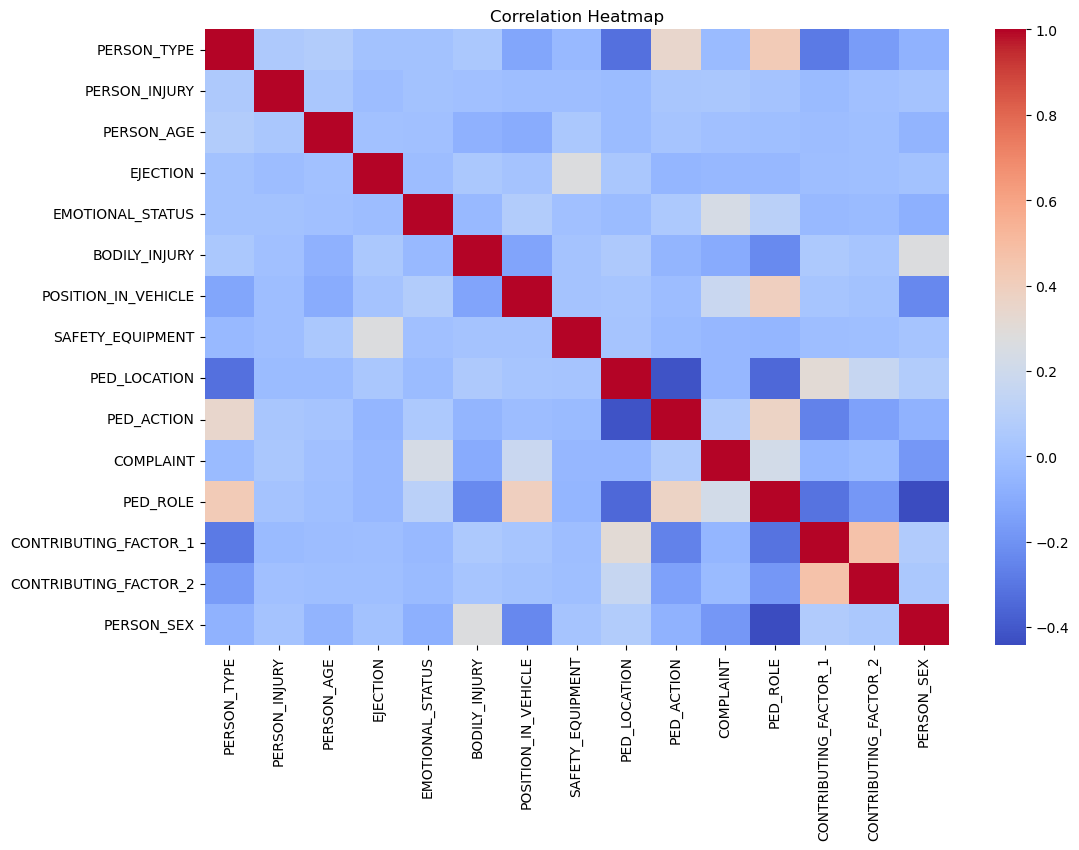

In [68]:
# Visualize a correlation heatmap:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 1. Distribution of Person Age

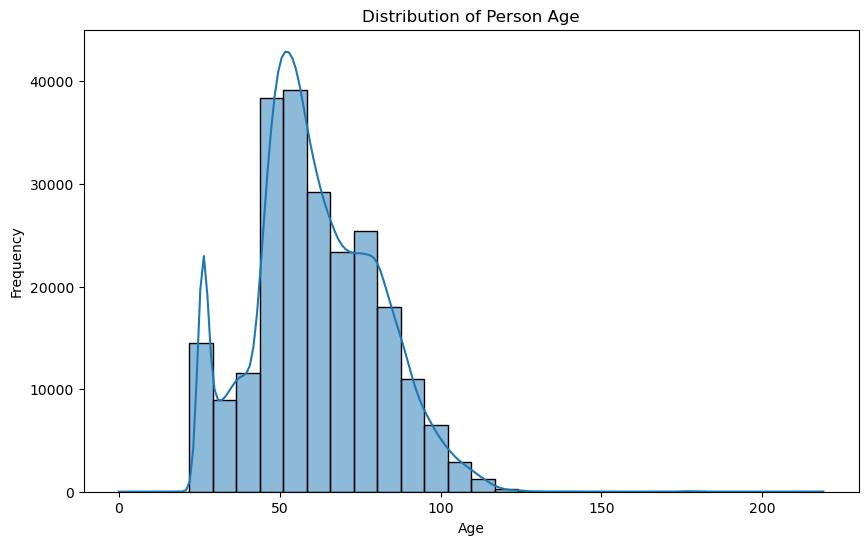

In [69]:
# Distribution of the 'PERSON_AGE' column
plt.figure(figsize=(10, 6))
sns.histplot(data['PERSON_AGE'], bins=30, kde=True)
plt.title('Distribution of Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2. Relationship between PERSON_AGE and PERSON_INJURY

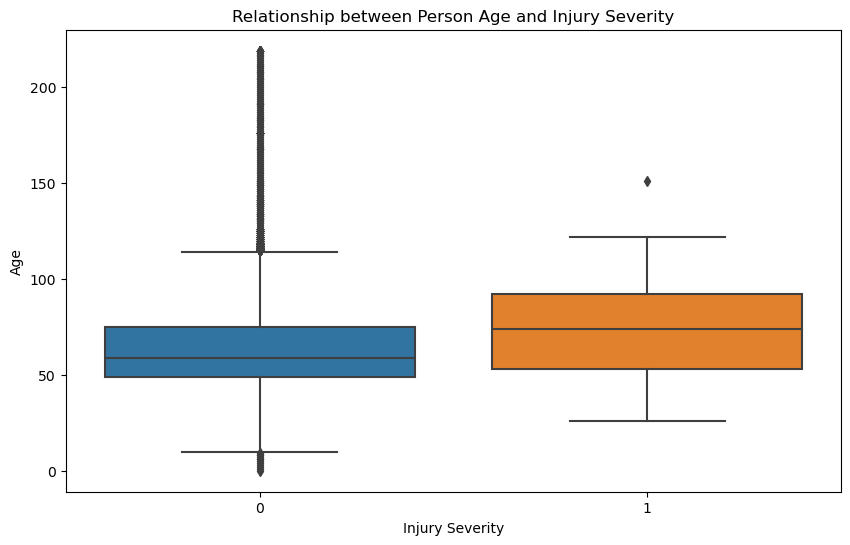

In [70]:
# Example: Relationship between 'PERSON_AGE' and 'PERSON_INJURY'
plt.figure(figsize=(10, 6))
sns.boxplot(x='PERSON_INJURY', y='PERSON_AGE', data=data)
plt.title('Relationship between Person Age and Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Age')
plt.show()

### Interpretation
Interpretations provide a clear understanding of the key findings from the visualizations and offer actionable insights for enhancing road safety and emergency response strategies.

## Data Exploration

- To understand patterns & potentially form some hypothesis

## 1. Severity Distribution

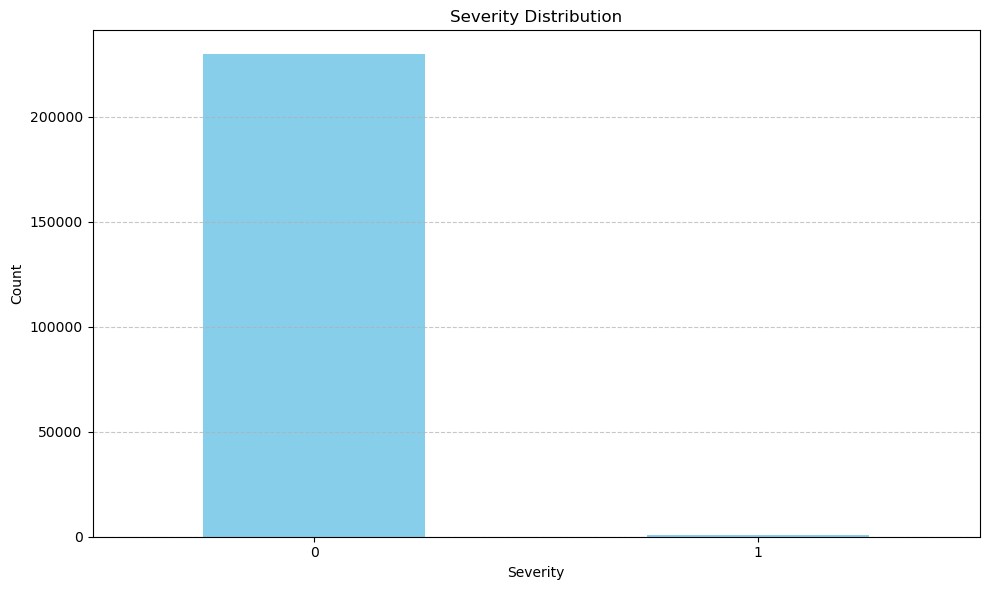

In [71]:
severity_counts = data['PERSON_INJURY'].value_counts()
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretation:The bar chart shows the distribution of injury severity among accident victims. 
It helps to understand the proportion of fatal vs non-fatal injuries.

## 2. Gender Distibution

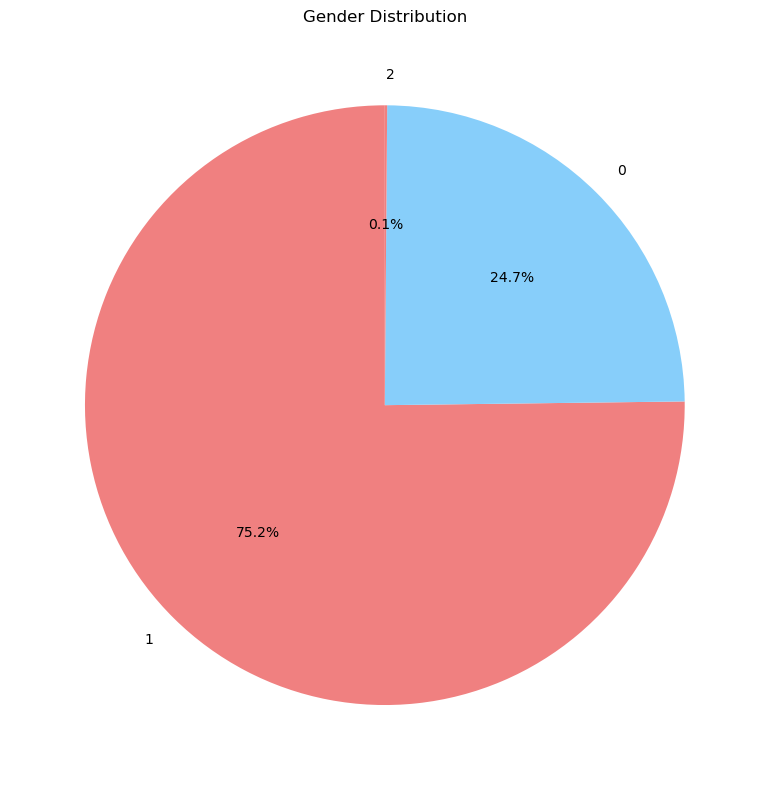

In [72]:
gender_counts = data['PERSON_SEX'].value_counts()
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

Interpretation:The pie chart represents the gender distribution of individuals involved in accidents. 
It helps to visualize the ratio of male to female victims.

### 3. Age Distribution of Injured Person

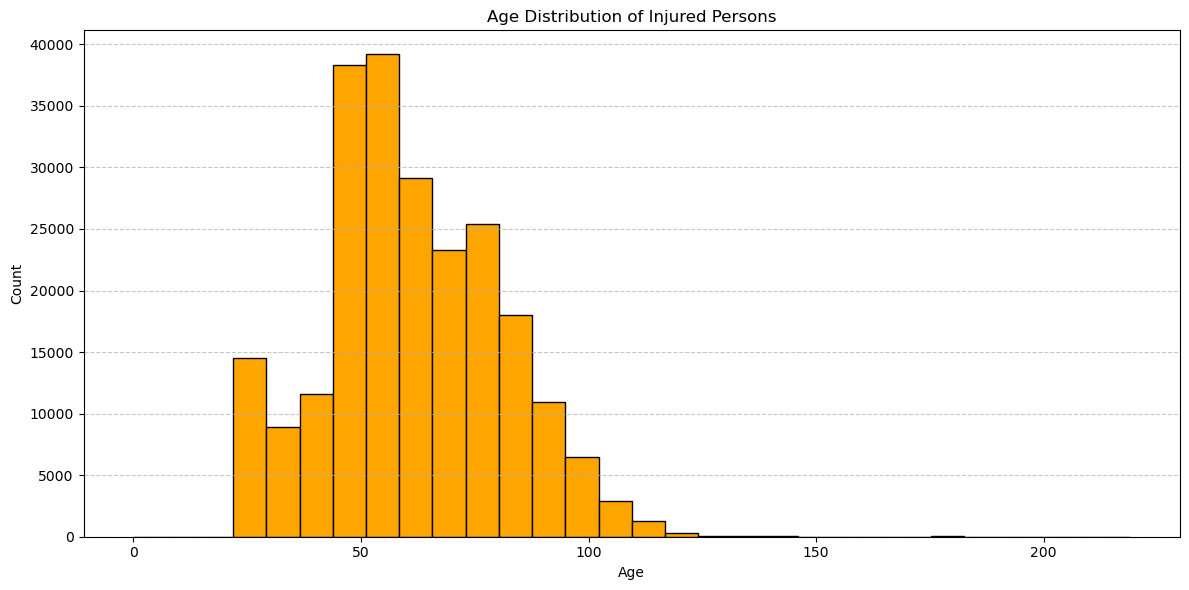

In [73]:
plt.figure(figsize=(12, 6))
data['PERSON_AGE'].plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Age Distribution of Injured Persons')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretation:The histogram displays the age distribution of injured persons. This helps in understanding which age groups are more frequently involved in accidents.

### 4. Top 10 Contributing Factors

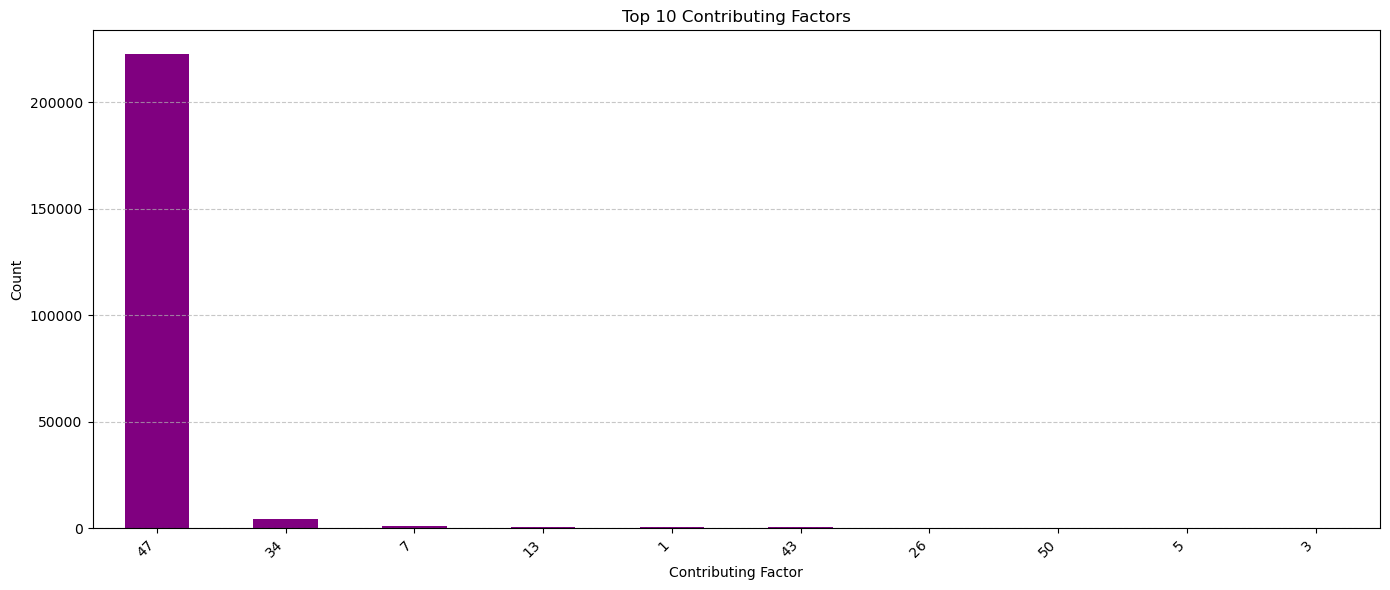

In [74]:
contributing_factors_counts = data['CONTRIBUTING_FACTOR_1'].value_counts().head(10)
plt.figure(figsize=(14, 6))
contributing_factors_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretation:The bar chart shows the top 10 contributing factors to vehicle accidents. This highlights the most common causes of accidents, 
providing insight into areas that need attention for safety improvements.

In [75]:
# Define features and target variable
X = data.drop('PERSON_INJURY', axis=1)
y = data['PERSON_INJURY']

In [76]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [77]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4: Predictive modeling-ML algorithms

Developing

- Logistic Regression
- Random Forest
- xgboost

### 1. Logistic Regression

In [78]:
# Train a logistic regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [79]:
# Make predictions
y_pred = model.predict(X_test)

In [80]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[35212 10721]
 [   62   137]]


In [81]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     45933
           1       0.01      0.69      0.02       199

    accuracy                           0.77     46132
   macro avg       0.51      0.73      0.45     46132
weighted avg       0.99      0.77      0.86     46132



In [82]:
log_reg_accuracy = metrics.accuracy_score(y_test, y_pred)
log_reg_precision = metrics.precision_score(y_test, y_pred, average='weighted')
log_reg_recall = metrics.recall_score(y_test, y_pred, average='weighted')
log_reg_f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics Logistic Regression
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy:.2f}")
print(f"Precision: {log_reg_precision:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"F1 Score: {log_reg_f1_score:.2f}")


Logistic Regression Metrics:
Accuracy: 0.77
Precision: 0.99
Recall: 0.77
F1 Score: 0.86


### Hyperparameter tuning for Logistic Regression

In [83]:
# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=10000,class_weight='balanced')

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_
print(f"Best params for Logistic Regression: {grid_search.best_params_}")

# Train and evaluate the model
best_log_reg.fit(X_train, y_train)
y_pred = best_log_reg.predict(X_test)
y_prob = best_log_reg.predict_proba(X_test)[:, 1]

print(f"--- Logistic Regression ---")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Best params for Logistic Regression: {'C': 0.01}
--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     45933
           1       0.01      0.69      0.02       199

    accuracy                           0.77     46132
   macro avg       0.51      0.73      0.45     46132
weighted avg       0.99      0.77      0.86     46132

AUC-ROC: 0.7828279927493256
Accuracy: 0.7660842798924824


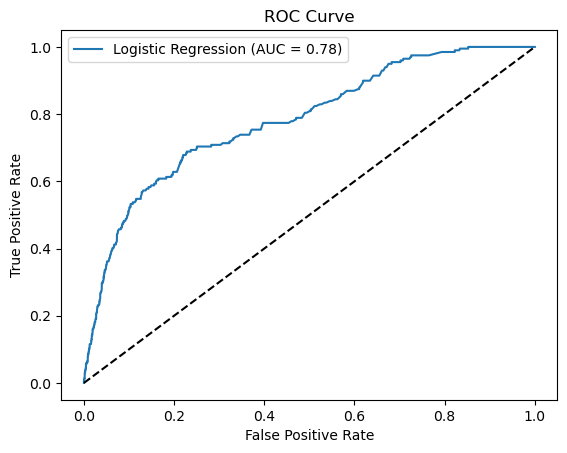

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 2. Random Forest

In [85]:
# Train Random Forest
rf_clf = RandomForestClassifier(random_state=42,class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [86]:
# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

In [87]:
# Print the classification report
print(f"--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))

--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     45933
           1       0.02      0.52      0.04       199

    accuracy                           0.89     46132
   macro avg       0.51      0.71      0.49     46132
weighted avg       0.99      0.89      0.94     46132



In [88]:
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_precision = metrics.precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = metrics.recall_score(y_test, y_pred_rf, average='weighted')
rf_f1_score = metrics.f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.89
Precision: 0.99
Recall: 0.89
F1 Score: 0.94


### Hyperparameter tuning for Random Forest

In [89]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best params for Random Forest: {grid_search.best_params_}")

# Train and evaluate the model
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print(f"--- Random Forest ---")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Best params for Random Forest: {'max_depth': 10, 'n_estimators': 200}
--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     45933
           1       0.03      0.66      0.05       199

    accuracy                           0.90     46132
   macro avg       0.51      0.78      0.50     46132
weighted avg       0.99      0.90      0.94     46132

AUC-ROC: 0.8890933779777778
Accuracy: 0.9001560738749674


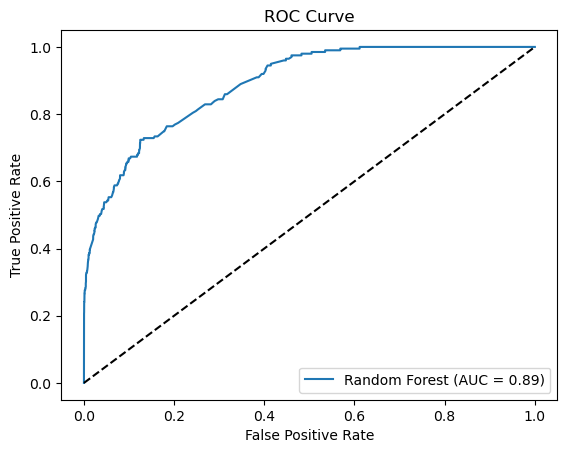

In [90]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob):.2f})")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### 3. XGBoost

In [91]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [92]:
# Make predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

In [93]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
AUC-ROC: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45933
           1       0.81      0.31      0.45       199

    accuracy                           1.00     46132
   macro avg       0.91      0.65      0.72     46132
weighted avg       1.00      1.00      1.00     46132

Confusion Matrix:
[[45919    14]
 [  138    61]]


In [94]:
xgb_accuracy = metrics.accuracy_score(y_test, y_pred)
xgb_precision = metrics.precision_score(y_test, y_pred, average='weighted')
xgb_recall = metrics.recall_score(y_test, y_pred, average='weighted')
xgb_f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics for Extreme Gradient Boosting
print("\nExtreme Gradient Boosting Metrics:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")
print(f"F1 Score: {xgb_f1_score:.2f}")


Extreme Gradient Boosting Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [95]:
# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
print(f"Best params for XGBoost: {grid_search.best_params_}")

# Train and evaluate the model
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

print(f"--- XGBoost ---")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
--- XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45933
           1       0.90      0.30      0.45       199

    accuracy                           1.00     46132
   macro avg       0.95      0.65      0.72     46132
weighted avg       1.00      1.00      1.00     46132

AUC-ROC: 0.9090826194631092
Accuracy: 0.9968351686464927


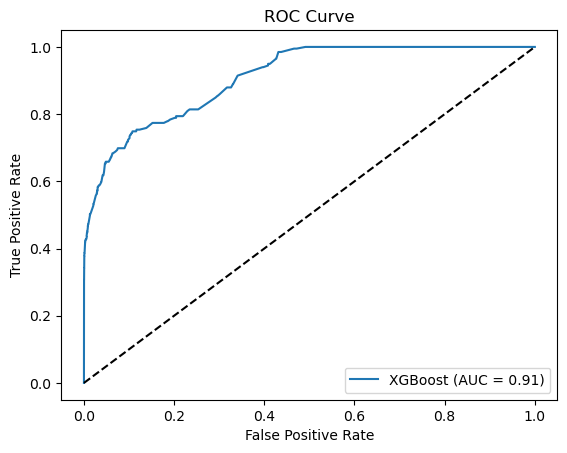

In [96]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_prob):.2f})")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Step 5:Results

In [97]:
# Compare the results of all models
print("\nComparison of Models:")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Extreme Gradient Boosting Accuracy: {xgb_accuracy:.2f}")


Comparison of Models:
Logistic Regression Accuracy: 0.77
Random Forest Accuracy: 0.89
Extreme Gradient Boosting Accuracy: 1.00


In [98]:
# Initialize a dictionary to store the accuracies of each model
accuracies = {}
recall={}
precision={}
Recall={}
F1_score={}
roc_data={}

In [99]:
# Add the accuracies of different models
accuracies['Logistic Regression'] = log_reg_accuracy
accuracies['Random Forest'] = rf_accuracy
accuracies['XGBoost'] = xgb_accuracy

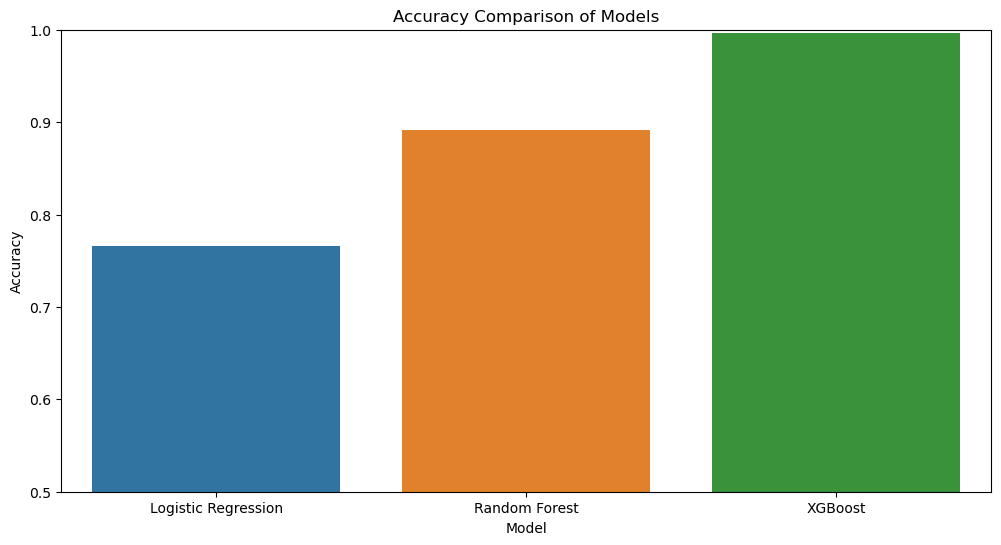

In [100]:
# Plot the accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Accuracy Comparison of Models")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.show()

In [101]:
# Add the accuracies of different models
precision['Logistic Regression'] = log_reg_precision
precision['Random Forest'] = rf_precision
precision['XGBoost'] = xgb_precision

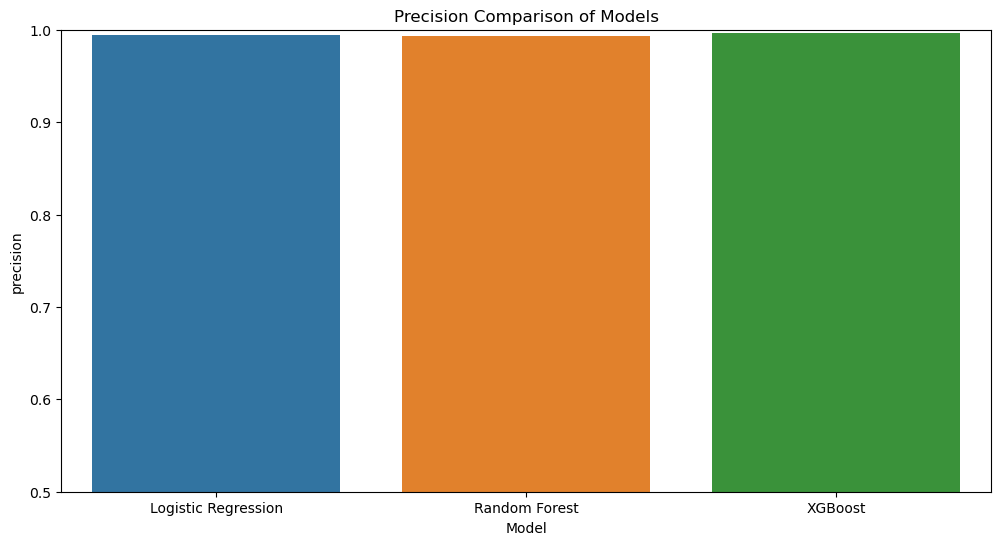

In [102]:
# Plot the Precision comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=list(precision.keys()), y=list(precision.values()))
plt.title("Precision Comparison of Models")
plt.xlabel('Model')
plt.ylabel('precision')
plt.ylim(0.5, 1)
plt.show()

In [103]:
# Add the accuracies of different models
recall['Logistic Regression'] = log_reg_recall
recall['Random Forest'] = rf_recall
recall['XGBoost'] = xgb_recall

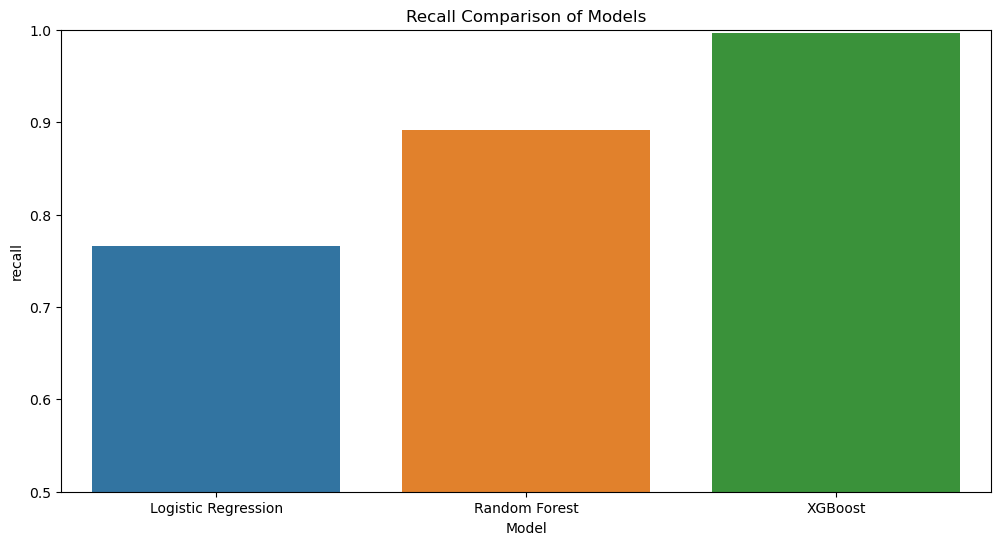

In [104]:
# Plot the Precision comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=list(recall.keys()), y=list(recall.values()))
plt.title("Recall Comparison of Models")
plt.xlabel('Model')
plt.ylabel('recall')
plt.ylim(0.5, 1)
plt.show()

In [105]:
# Add the accuracies of different models
F1_score['Logistic Regression'] = log_reg_f1_score
F1_score['Random Forest'] = rf_f1_score
F1_score['XGBoost'] = xgb_f1_score

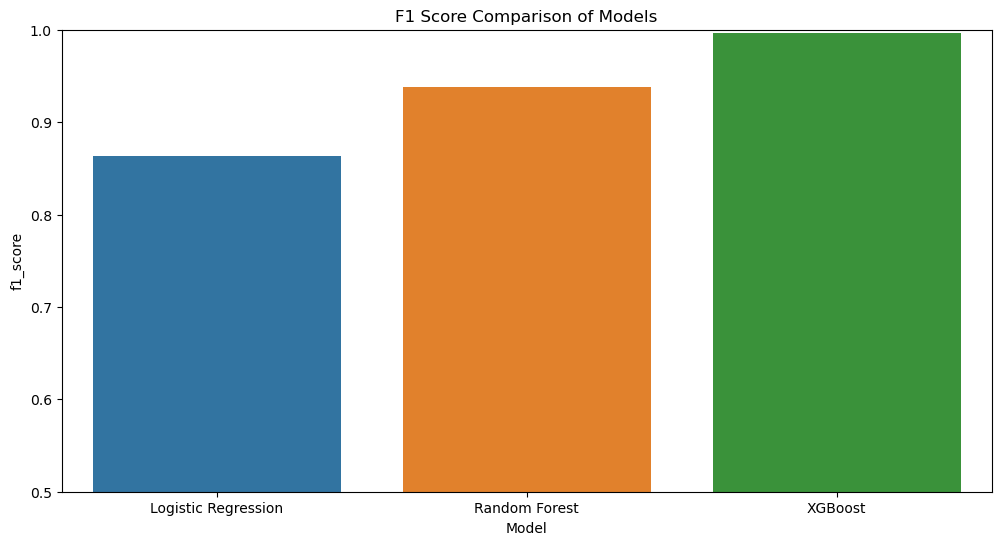

In [106]:
# Plot the Precision comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=list(F1_score.keys()), y=list(F1_score.values()))
plt.title("F1 Score Comparison of Models")
plt.xlabel('Model')
plt.ylabel('f1_score')
plt.ylim(0.5, 1)
plt.show()